# **Analisis Hasil Data Scraping Proyek Fundamental Deep Learning**



Nama: Theodorus Andang Jatmiko

Email: theodorusaj@student.ub.ac.id

ID Dicoding: MC006D5Y1490

## **Import Semua Packages/Library yang Digunakan**

In [1]:
!pip install Sastrawi

In [2]:
!pip install --quiet gdown

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import json
import requests
import pickle
import ast
import os
import gdown
import nltk

In [4]:
# Pastikan nltk package di-download
nltk.download('stopwords')
nltk.download('punkt', quiet=False)
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Untuk analisis teks dan sentimen sederhana
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from ast import literal_eval

In [6]:
!pip install numpy==1.26.4

In [7]:
!pip install --no-deps tensorflow==2.18.0

In [8]:
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

## **DATA WRANGLING**

Memuat Dataset Ulasan Aplikasi Instagram (Gathering Data)

In [11]:
import gdown

# File ID for slangwords.txt
file_id_slangwords = '1sF-21nA0Qc2x2Zz2XyHLbpAZMxOHVU-X'
url_slangwords = f'https://drive.google.com/uc?export=download&id={file_id_slangwords}'
output_slangwords = 'slangwords.txt'
gdown.download(url_slangwords, output_slangwords, quiet=False)

# File ID for positive.csv
file_id_positive = '19LS264B4b7gRDo9NuEDRksVqjXoD-MJm'
url_positive = f'https://drive.google.com/uc?export=download&id={file_id_positive}'
output_positive = 'positive.csv'
gdown.download(url_positive, output_positive, quiet=False)

# File ID for negative.csv
file_id_negative = '1kbHDx3kRk_cGrpq8RIRORdifZAjuUFz6'
url_negative = f'https://drive.google.com/uc?export=download&id={file_id_negative}'
output_negative = 'negative.csv'
gdown.download(url_negative, output_negative, quiet=False)

# File ID for Instagram_reviews.csv
file_id_instagram = '1GPzUVuB9k97hFdNq-mj64nqkpXAz-dkm'
url_instagram = f'https://drive.google.com/uc?export=download&id={file_id_instagram}'
output_instagram = 'Instagram_reviews.csv'
gdown.download(url_instagram, output_instagram, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1sF-21nA0Qc2x2Zz2XyHLbpAZMxOHVU-X
To: /content/slangwords.txt
100%|██████████| 42.6k/42.6k [00:00<00:00, 62.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=19LS264B4b7gRDo9NuEDRksVqjXoD-MJm
To: /content/positive.csv
100%|██████████| 37.9k/37.9k [00:00<00:00, 60.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1kbHDx3kRk_cGrpq8RIRORdifZAjuUFz6
To: /content/negative.csv
100%|██████████| 76.2k/76.2k [00:00<00:00, 4.01MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1GPzUVuB9k97hFdNq-mj64nqkpXAz-dkm
To: /content/Instagram_reviews.csv
100%|██████████| 11.2M/11.2M [00:00<00:00, 51.7MB/s]


'Instagram_reviews.csv'

In [12]:
import pandas as pd

df = pd.read_csv('Instagram_reviews.csv')
display(df.head())

,content,score
0,ok,5
1,sangat objektip dan memuaskan,5
2,baaaaaaagus sangat thnksss honey,5
3,good,5
4,"Tolong dong, kok gak ada fitur saluran siaran ...",2


In [13]:
print(df.shape)

(243000, 2)


In [14]:
# Mengambil sampel acak 20 ribu baris dari DataFrame df tanpa pengembalian
df_sample = df.sample(n=20000, random_state=42)

In [15]:
df_sample.head()

,content,score
228480,Mantap 🔥,5
13398,"Gatau kenapa, dari kemarin tuh aku gabisa buat...",1
149727,Dukun aku buat menjangkau bintang direels,5
8960,ada apakah selalu for close pas mau membuka ap...,1
200730,Good,5


In [16]:
print(df_sample.shape)

(20000, 2)


In [17]:
df_sample.to_csv('Instagram_reviews_sample.csv', index=False)

## **Assessing Data**

In [18]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 228480 to 44965
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  19999 non-null  object
 1   score    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB
None


In [19]:
print(df_sample.describe())

             score
count  20000.00000
mean       3.92170
std        1.58726
min        1.00000
25%        3.00000
50%        5.00000
75%        5.00000
max        5.00000


## **Cleaning Data**

In [20]:
#Mengecek missing value
missing_values = df_sample.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 content    1
dtype: int64


In [21]:
df_sample.dropna(axis=0, inplace=True)

In [22]:
print("Sudah tidak ada data yang hilang?", df_sample.isnull().sum().sum() == 0)

Sudah tidak ada data yang hilang? True


In [23]:
# cek ulang missing values
print("\nMissing Values setelah dilakukan cleaning:")
print(df_sample.isnull().sum())


Missing Values setelah dilakukan cleaning:
content    0
score      0
dtype: int64


## **Exploratory Data Analysis (EDA)**

In [24]:
# Melihat info tipe data dan keberadaan missing value
print(df_sample.info())

# Melihat statistik deskriptif untuk kolom numerik (score)
print(df_sample['score'].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 228480 to 44965
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  19999 non-null  object
 1   score    19999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.7+ KB
None
count    19999.000000
mean         3.921646
std          1.587282
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64


In [25]:
print("\nMissing Values setelah dilakukan cleaning:")
print(df_sample.isnull().sum())


Missing Values setelah dilakukan cleaning:
content    0
score      0
dtype: int64


/tmp/ipython-input-26-3759852058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df_sample, palette='muted')


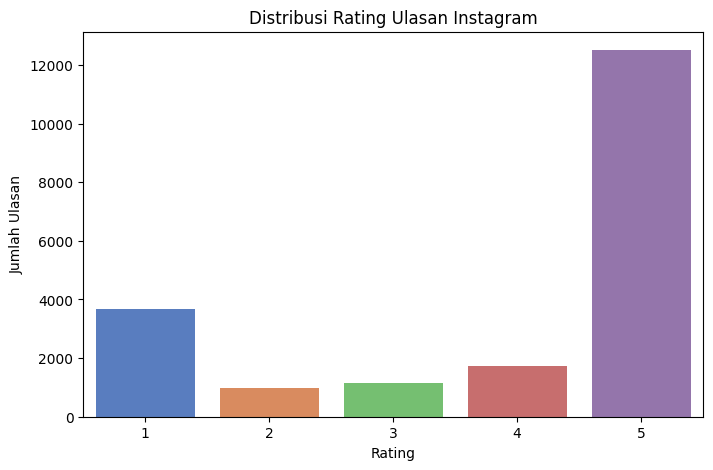

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='score', data=df_sample, palette='muted')
plt.title('Distribusi Rating Ulasan Instagram')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.show()

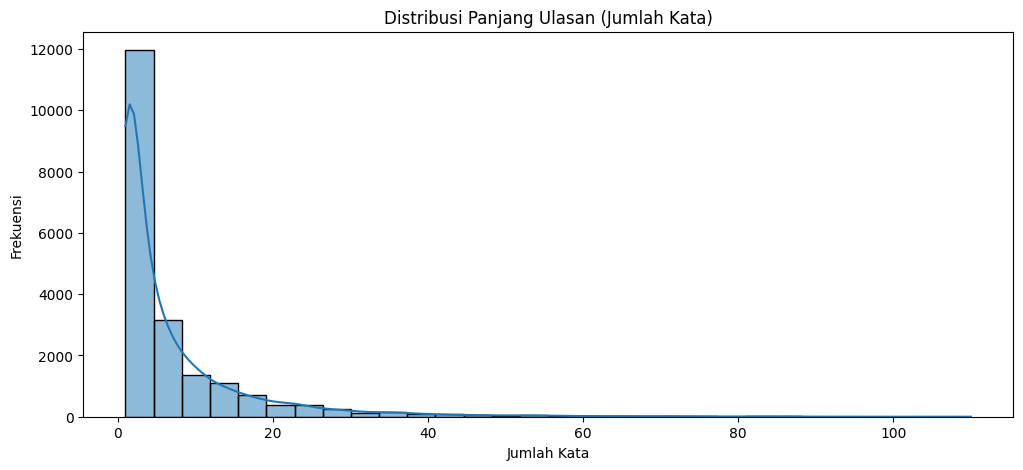

In [27]:
# Hitung jumlah kata per ulasan
df_sample['word_count'] = df_sample['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,5))
sns.histplot(df_sample['word_count'], bins=30, kde=True)
plt.title('Distribusi Panjang Ulasan (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

## **Text Preprocessing**

In [28]:
def proses_teks(teks):
    # Hapus mention (@username)
    teks = re.sub(r'@\w+', '', teks)
    # Hapus hashtag (#hashtag)
    teks = re.sub(r'#\w+', '', teks)
    # Hapus karakter khusus tertentu (misal simbol²)
    teks = re.sub(r'[²]', '', teks)
    # Hapus angka
    teks = re.sub(r'\d+', '', teks)
    # Hapus tanda baca
    teks = teks.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi lebih dari 1 dan trim spasi di awal/akhir
    teks = re.sub(r'\s+', ' ', teks).strip()

    return teks

df_sample['clean_content'] = df_sample['content'].apply(proses_teks)


### **Case Folding**

In [29]:
def casefoldingText(teks):
    return str(teks).lower()

df_sample['casefold_content'] = df_sample['clean_content'].apply(casefoldingText)

print(df_sample[['clean_content', 'casefold_content']].head())

                                            clean_content  \
228480                                           Mantap 🔥   
13398   Gatau kenapa dari kemarin tuh aku gabisa buat ...   
149727          Dukun aku buat menjangkau bintang direels   
8960    ada apakah selalu for close pas mau membuka ap...   
200730                                               Good   

                                         casefold_content  
228480                                           mantap 🔥  
13398   gatau kenapa dari kemarin tuh aku gabisa buat ...  
149727          dukun aku buat menjangkau bintang direels  
8960    ada apakah selalu for close pas mau membuka ap...  
200730                                               good  


### **Fungsi Tokenisasi Teks**

In [30]:
# Fungsi tokenizing, menerima input teks string, output list token kata
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def tokenizing(teks):
    return word_tokenize(teks)

# Terapkan tokenizing pada kolom casefold_content
df_sample['tokens'] = df_sample['casefold_content'].apply(tokenizing)

# Contoh tampilkan hasil tokenizing
print(df_sample[['casefold_content', 'tokens']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                         casefold_content  \
228480                                           mantap 🔥   
13398   gatau kenapa dari kemarin tuh aku gabisa buat ...   
149727          dukun aku buat menjangkau bintang direels   
8960    ada apakah selalu for close pas mau membuka ap...   
200730                                               good   

                                                   tokens  
228480                                        [mantap, 🔥]  
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...  
149727   [dukun, aku, buat, menjangkau, bintang, direels]  
8960    [ada, apakah, selalu, for, close, pas, mau, me...  
200730                                             [good]  


### **Stemming**

In [31]:
# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming setiap token dalam list
def stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Terapkan proses stemming pada kolom 'tokens'
df_sample['stemmed_tokens'] = df_sample['tokens'].apply(stemming)

# Tampilkan contoh hasil stemming
print(df_sample[['tokens', 'stemmed_tokens']].head())

                                                   tokens  \
228480                                        [mantap, 🔥]   
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...   
149727   [dukun, aku, buat, menjangkau, bintang, direels]   
8960    [ada, apakah, selalu, for, close, pas, mau, me...   
200730                                             [good]   

                                           stemmed_tokens  
228480                                         [mantap, ]  
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...  
149727      [dukun, aku, buat, jangkau, bintang, direels]  
8960    [ada, apakah, selalu, for, close, pas, mau, bu...  
200730                                             [good]  


### **Negation Handling**

In [32]:
def negation_handling(stemmed_tokens):
    negation_words = {'tidak', 'jangan', 'bukan', 'belum'}
    hasil = []
    skip_next = False
    for i in range(len(stemmed_tokens)):
        if skip_next:
            skip_next = False
            continue

        token = stemmed_tokens[i]
        if token in negation_words and i+1 < len(stemmed_tokens):
            # Gabungkan kata negasi dengan kata setelahnya
            combined = token + '_' + stemmed_tokens[i+1]
            hasil.append(combined)
            skip_next = True  # lewati kata berikutnya karena sudah digabung
        else:
            hasil.append(token)
    return hasil

# Terapkan pada kolom stemmed_tokens
df_sample['tokens_negation'] = df_sample['stemmed_tokens'].apply(negation_handling)

# Contoh lihat hasilnya
print(df_sample[['stemmed_tokens', 'tokens_negation']].head())

                                           stemmed_tokens  \
228480                                         [mantap, ]   
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...   
149727      [dukun, aku, buat, jangkau, bintang, direels]   
8960    [ada, apakah, selalu, for, close, pas, mau, bu...   
200730                                             [good]   

                                          tokens_negation  
228480                                         [mantap, ]  
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...  
149727      [dukun, aku, buat, jangkau, bintang, direels]  
8960    [ada, apakah, selalu, for, close, pas, mau, bu...  
200730                                             [good]  


### **Word Normalization**

In [33]:
def convertToSlangword(tokens_negation):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in tokens_negation:
        filter_slang = pattern.sub(lambda x: kamusSlang[x.group()], kata.lower())
        if filter_slang.startswith('tidak_'):
          kata_depan = 'tidak_'
          kata_belakang = kata[6:]
          kata_belakang_slang = pattern.sub(lambda x: kamusSlang[x.group()], kata_belakang.lower())
          kata_hasil = kata_depan + kata_belakang_slang
          content.append(kata_hasil)
        else:
          content.append(filter_slang)
    ulasan = content
    return ulasan

df_sample['tokens_slang'] = df_sample['tokens_negation'].apply(convertToSlangword)

# Contoh lihat hasilnya
print(df_sample[['tokens_negation', 'tokens_slang']].head())

                                          tokens_negation  \
228480                                         [mantap, ]   
13398   [gatau, kenapa, dari, kemarin, tuh, aku, gabis...   
149727      [dukun, aku, buat, jangkau, bintang, direels]   
8960    [ada, apakah, selalu, for, close, pas, mau, bu...   
200730                                             [good]   

                                             tokens_slang  
228480                                         [mantap, ]  
13398   [gatau, kenapa, dari, kemarin, tuh, aku, tidak...  
149727      [dukun, aku, buat, jangkau, bintang, direels]  
8960    [ada, apakah, selalu, for, tutup, pas, mau, bu...  
200730                                            [bagus]  


### **Fungsi Penghapusan Stopwords**

In [34]:
def hapus_stopwords(tokens_slang):
    stop_words = set(stopwords.words('indonesian'))
    stop_words_english = set(stopwords.words('english'))

    stop_words.update(stop_words_english)
    stop_words.update([
        'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku',
        'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'
    ])
    hasil_hapus = [kata for kata in tokens_slang if kata not in stop_words]
    return hasil_hapus
df_sample['stopword_removal'] = df_sample['tokens_slang'].apply(hapus_stopwords)

# Contoh lihat hasilnya
print(df_sample[['tokens_slang', 'stopword_removal']].head())

                                             tokens_slang  \
228480                                         [mantap, ]   
13398   [gatau, kenapa, dari, kemarin, tuh, aku, tidak...   
149727      [dukun, aku, buat, jangkau, bintang, direels]   
8960    [ada, apakah, selalu, for, tutup, pas, mau, bu...   
200730                                            [bagus]   

                                         stopword_removal  
228480                                         [mantap, ]  
13398   [gatau, kemarin, tuh, tidak bisa, postingan, e...  
149727                 [dukun, jangkau, bintang, direels]  
8960              [tutup, pas, buka, aplikasi, instagram]  
200730                                            [bagus]  


In [35]:
df_sample.to_csv('data_bersih.csv', index=False)

## **Pelabelan Menggunakan Lexikon**

In [36]:
df_bersih = pd.read_csv('data_bersih.csv')

In [37]:
print("\nMissing Values setelah dilakukan cleaning:")
print(df_bersih.isnull().sum())


Missing Values setelah dilakukan cleaning:
content             0
score               0
word_count          0
clean_content       2
casefold_content    2
tokens              0
stemmed_tokens      0
tokens_negation     0
tokens_slang        0
stopword_removal    0
dtype: int64


In [38]:
df_bersih.dropna(axis=0, inplace=True)

In [39]:
print("\nMissing Values setelah dilakukan cleaning:")
print(df_bersih.isnull().sum())


Missing Values setelah dilakukan cleaning:
content             0
score               0
word_count          0
clean_content       0
casefold_content    0
tokens              0
stemmed_tokens      0
tokens_negation     0
tokens_slang        0
stopword_removal    0
dtype: int64


In [40]:
df_bersih.head()

,content,score,word_count,clean_content,casefold_content,tokens,stemmed_tokens,tokens_negation,tokens_slang,stopword_removal
0,Mantap 🔥,5,2,Mantap 🔥,mantap 🔥,"['mantap', '🔥']","['mantap', '']","['mantap', '']","['mantap', '']","['mantap', '']"
1,"Gatau kenapa, dari kemarin tuh aku gabisa buat...",1,30,Gatau kenapa dari kemarin tuh aku gabisa buat ...,gatau kenapa dari kemarin tuh aku gabisa buat ...,"['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kemarin', 'tuh', 'tidak bisa', 'pos..."
2,Dukun aku buat menjangkau bintang direels,5,6,Dukun aku buat menjangkau bintang direels,dukun aku buat menjangkau bintang direels,"['dukun', 'aku', 'buat', 'menjangkau', 'bintan...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'jangkau', 'bintang', 'direels']"
3,ada apakah selalu for close pas mau membuka ap...,1,11,ada apakah selalu for close pas mau membuka ap...,ada apakah selalu for close pas mau membuka ap...,"['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'tutup', 'p...","['tutup', 'pas', 'buka', 'aplikasi', 'instagram']"
4,Good,5,1,Good,good,['good'],['good'],['good'],['bagus'],['bagus']


In [41]:
df_bersih['stopword_removal'] = df_bersih['stopword_removal'].apply(ast.literal_eval)

In [42]:
#Mengakses csv data word positive dan negative
df_positive = pd.read_csv('positive.csv', header=0, sep='\t', encoding='utf-8')
df_negative = pd.read_csv('negative.csv', header=0, sep='\t', encoding='utf-8')

In [43]:
#Menampilkan data kata-kata negative
df_negative.head()

,word,weight
0,putus tali gantung,-2
1,gelebah,-2
2,gobar hati,-2
3,tersentuh (perasaan),-1
4,isak,-5


In [44]:
#Menampilkan data kata-kata positive
df_positive.head()

,word,weight
0,hai,3
1,merekam,2
2,ekstensif,3
3,paripurna,1
4,detail,2


In [45]:
#Cleaning dataset kata positive dan negative
positive_words = set(df_positive['word'].str.strip().dropna())
negative_words = set(df_negative['word'].str.strip().dropna())

In [46]:
# Fungsi pelabelan sentimen dengan skor lexikon
def lexicon_sentiment_scoring(token_list):
    score = 0
    for token in token_list:
        if token in positive_words:
            score += 1
        elif token in negative_words:
            score -= 1
    if score > 0:
        label = 'positif'
    elif score < 0:
        label = 'negatif'
    else:
        label = 'netral'
    return label, score

df_bersih['sentiment_result'] = df_bersih['stopword_removal'].apply(lexicon_sentiment_scoring)
df_bersih[['sentiment_label', 'sentiment_score']] = pd.DataFrame(df_bersih['sentiment_result'].tolist(), index=df_bersih.index)
df_bersih.drop(columns=['sentiment_result'], inplace=True)
df_bersih.to_csv('data_bersih_berlabel.csv', index=False, encoding='utf-8')

print("Pelabelan sentimen selesai dan disimpan pada 'data_bersih_berlabel.csv'")

Pelabelan sentimen selesai dan disimpan pada 'data_bersih_berlabel.csv'


In [47]:
ulasan = pd.read_csv('data_bersih_berlabel.csv')

In [48]:
print("\nMissing Values setelah dilakukan cleaning:")
print(ulasan.isnull().sum())


Missing Values setelah dilakukan cleaning:
content             0
score               0
word_count          0
clean_content       0
casefold_content    0
tokens              0
stemmed_tokens      0
tokens_negation     0
tokens_slang        0
stopword_removal    0
sentiment_label     0
sentiment_score     0
dtype: int64


In [49]:
ulasan.head()

,content,score,word_count,clean_content,casefold_content,tokens,stemmed_tokens,tokens_negation,tokens_slang,stopword_removal,sentiment_label,sentiment_score
0,Mantap 🔥,5,2,Mantap 🔥,mantap 🔥,"['mantap', '🔥']","['mantap', '']","['mantap', '']","['mantap', '']","['mantap', '']",positif,1
1,"Gatau kenapa, dari kemarin tuh aku gabisa buat...",1,30,Gatau kenapa dari kemarin tuh aku gabisa buat ...,gatau kenapa dari kemarin tuh aku gabisa buat ...,"['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kemarin', 'tuh', 'tidak bisa', 'pos...",positif,1
2,Dukun aku buat menjangkau bintang direels,5,6,Dukun aku buat menjangkau bintang direels,dukun aku buat menjangkau bintang direels,"['dukun', 'aku', 'buat', 'menjangkau', 'bintan...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'jangkau', 'bintang', 'direels']",negatif,-1
3,ada apakah selalu for close pas mau membuka ap...,1,11,ada apakah selalu for close pas mau membuka ap...,ada apakah selalu for close pas mau membuka ap...,"['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'tutup', 'p...","['tutup', 'pas', 'buka', 'aplikasi', 'instagram']",netral,0
4,Good,5,1,Good,good,['good'],['good'],['good'],['bagus'],['bagus'],positif,1


In [50]:
ulasan['sentiment_label'].value_counts()

,count
sentiment_label,
positif,12229
netral,6081
negatif,1687


## **Visualisasi Distribusi Sentimen Ulasan Instagram**

jumlah sentimen :
sentiment_label
positif    12229
netral      6081
negatif     1687
Name: count, dtype: int64


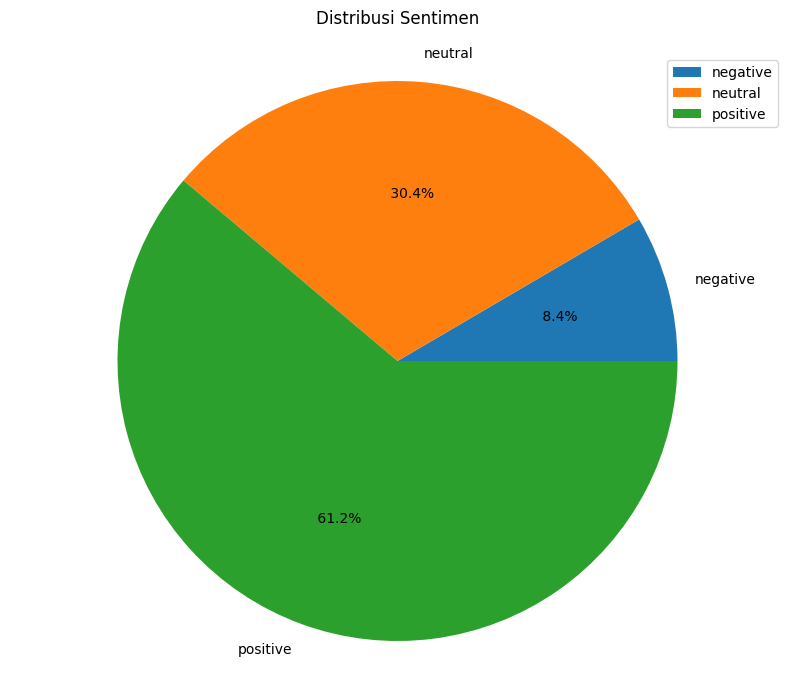

In [51]:
# melihat jumlah kelas sentimen
Jumlah_sentimen = ulasan['sentiment_label'].value_counts()
print("jumlah sentimen :")
print(Jumlah_sentimen)

# menampilkan dalam bentuk plot diagram
%matplotlib inline
labels = ['negative' , 'neutral', 'positive']
plt.figure(figsize=(10, 8))
plt.pie(ulasan.groupby('sentiment_label')['sentiment_label'].count(), autopct=" %.1f%% " ,labels=labels)
plt.legend()
plt.axis('equal')
plt.title('Distribusi Sentimen\n')
plt.show()

## **Visualisasi Histogram Skor Sentimen**

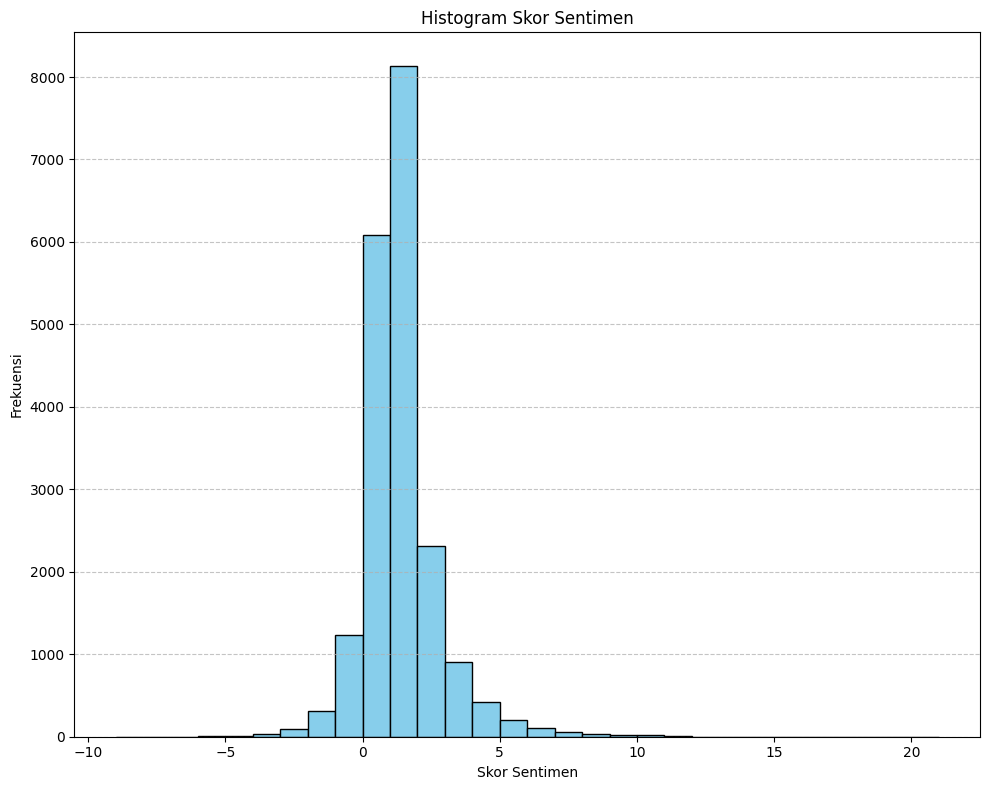

In [52]:
plt.figure(figsize=(10,8))
plt.hist(ulasan['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Skor Sentimen')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.tight_layout()
plt.show()

## **Data Preparation**

In [53]:
# Tangani nilai NaN
ulasan['stopword_removal'] = ulasan['stopword_removal'].fillna('')

In [54]:
max_features = 10000  # Tingkatkan jumlah kata
tokenizer = Tokenizer(num_words=max_features, oov_token="") # Tambahkan oov_token
tokenizer.fit_on_texts(ulasan['stopword_removal'])

In [55]:
sequences = tokenizer.texts_to_sequences(ulasan['stopword_removal'])

In [56]:
max_length = 100  # Eksperimen dengan panjang sequence
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [57]:
# Pilih fitur (teks ulasan) dan target (label sentimen)
fitur = ulasan['stopword_removal']
label = ulasan['sentiment_label'].map({'positif': 2, 'netral': 1, 'negatif': 0})

## **Feature Engineering**

## **TF-IDF**

In [58]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
fitur_tfidf = tfidf.fit_transform(fitur)

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {fitur_tfidf.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (19997, 9907)


## **SVM x TF-IDF (80/20)**

Praprocessing Teks untuk Model SVM Menggunakan TF-IDF (80/20)

In [59]:
# Membagi Data menjadi Set Pelatihan dan Pengujian
fitur_train_svm, fitur_test_svm, label_train_svm, label_test_svm = train_test_split(fitur_tfidf, label, test_size=0.2, random_state=42)

print("Total Sampel:")
print(f"Set pelatihan: {fitur_train_svm.shape[0]} sampel")
print(f"Set pengujian: {fitur_test_svm.shape[0]} sampel")

Total Sampel:
Set pelatihan: 15997 sampel
Set pengujian: 4000 sampel


Pelatihan dan Prediksi Model SVM


In [60]:
# Inisialisasi Model SVM dengan Kernel Linear
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(fitur_train_svm, label_train_svm)
label_pred_svm = svm_model.predict(fitur_test_svm)

accuracy_svm = accuracy_score(label_test_svm, label_pred_svm)
print(f"Akurasi SVM: {accuracy_svm}")
print(classification_report(label_test_svm, label_pred_svm))

Akurasi SVM: 0.937
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       335
           1       0.87      0.94      0.90      1232
           2       0.98      0.96      0.97      2433

    accuracy                           0.94      4000
   macro avg       0.92      0.88      0.90      4000
weighted avg       0.94      0.94      0.94      4000



Evaluasi Model SVM Berbasis TF-IDF

Akurasi Training SVM: 0.9821841595299119
Akurasi Testing SVM: 0.937
Classification Report SVM:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       335
           1       0.87      0.94      0.90      1232
           2       0.98      0.96      0.97      2433

    accuracy                           0.94      4000
   macro avg       0.92      0.88      0.90      4000
weighted avg       0.94      0.94      0.94      4000



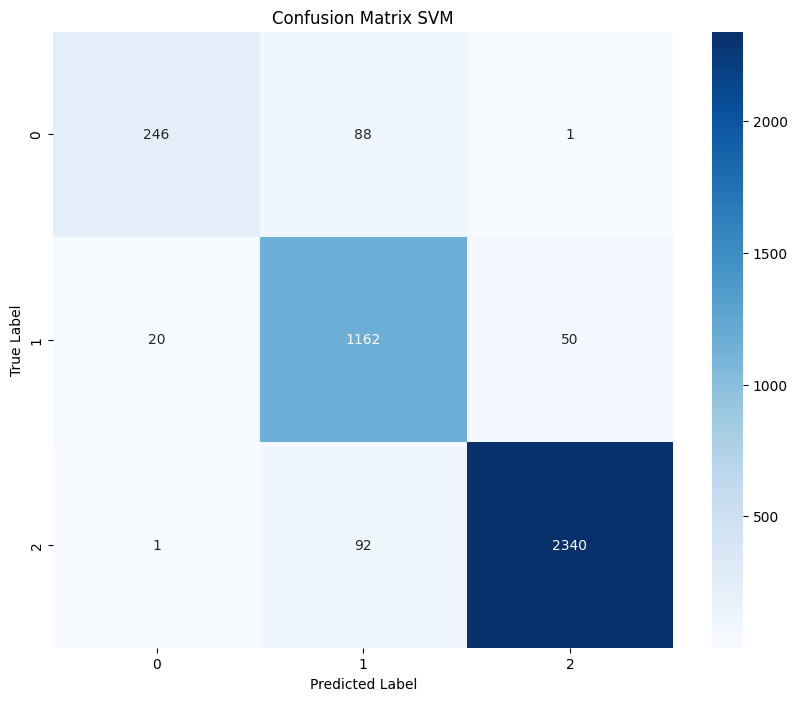

In [61]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(fitur_train_svm, label_train_svm)
label_pred_svm = svm_model.predict(fitur_test_svm)

# Evaluasi pada data training
label_pred_train_svm = svm_model.predict(fitur_train_svm)
accuracy_train_svm = accuracy_score(label_train_svm, label_pred_train_svm)
print(f"Akurasi Training SVM: {accuracy_train_svm}")

# Evaluasi pada data testing
accuracy_svm = accuracy_score(label_test_svm, label_pred_svm)
print(f"Akurasi Testing SVM: {accuracy_svm}")
print("Classification Report SVM:")
print(classification_report(label_test_svm, label_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(label_test_svm, label_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **SVM x TF-IDF (60/40)**

Praprocessing Teks untuk Model SVM Menggunakan TF-IDF (60/40)

In [62]:
# Membagi Data menjadi Set Pelatihan dan Pengujian
fitur_train_svm2, fitur_test_svm2, label_train_svm2, label_test_svm2 = train_test_split(fitur_tfidf, label, test_size=0.4, random_state=42)

print("Total Sampel:")
print(f"Set pelatihan: {fitur_train_svm2.shape[0]} sampel")
print(f"Set pengujian: {fitur_test_svm2.shape[0]} sampel")

Total Sampel:
Set pelatihan: 11998 sampel
Set pengujian: 7999 sampel


Pelatihan dan Prediksi Model SVM

In [63]:
# Inisialisasi Model SVM dengan Kernel Linear
svm_model2 = SVC(kernel='linear', C=1)
svm_model2.fit(fitur_train_svm2, label_train_svm2)
label_pred_svm2 = svm_model2.predict(fitur_test_svm2)

accuracy_svm2 = accuracy_score(label_test_svm2, label_pred_svm2)
print(f"Akurasi SVM: {accuracy_svm2}")
print(classification_report(label_test_svm2, label_pred_svm2))

Akurasi SVM: 0.9257407175896987
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       651
           1       0.84      0.93      0.88      2391
           2       0.97      0.96      0.96      4957

    accuracy                           0.93      7999
   macro avg       0.90      0.86      0.87      7999
weighted avg       0.93      0.93      0.93      7999



Evaluasi Model SVM Berbasis TF-IDF

Akurasi Training SVM: 0.9794965827637939
Akurasi Testing SVM: 0.9606200775096887
Classification Report SVM:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       651
           1       0.91      0.96      0.94      2391
           2       0.99      0.98      0.98      4957

    accuracy                           0.96      7999
   macro avg       0.95      0.92      0.93      7999
weighted avg       0.96      0.96      0.96      7999



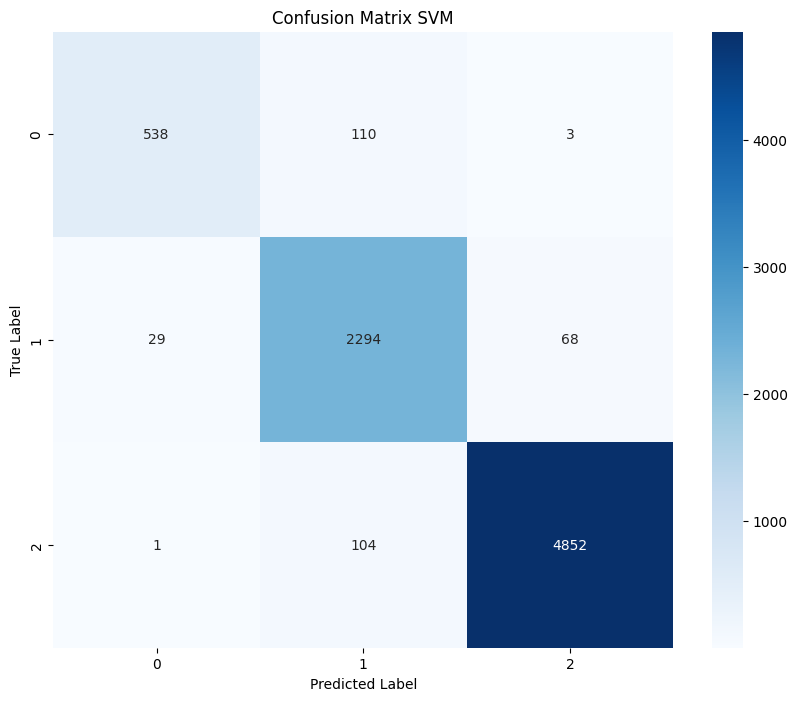

In [64]:
svm_model2 = SVC(kernel='linear', C=1)
svm_model2.fit(fitur_train_svm2, label_train_svm2)
label_pred_svm2 = svm_model.predict(fitur_test_svm2)

# Evaluasi pada data training
label_pred_train_svm2 = svm_model2.predict(fitur_train_svm2)
accuracy_train_svm2 = accuracy_score(label_train_svm2, label_pred_train_svm2)
print(f"Akurasi Training SVM: {accuracy_train_svm2}")

# Evaluasi pada data testing
accuracy_svm2 = accuracy_score(label_test_svm2, label_pred_svm2)
print(f"Akurasi Testing SVM: {accuracy_svm2}")
print("Classification Report SVM:")
print(classification_report(label_test_svm2, label_pred_svm2))

# Confusion Matrix
cm_svm2 = confusion_matrix(label_test_svm2, label_pred_svm2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **RF x TF-IDF (70/30)**

Praprocessing Teks untuk Model RF Menggunakan TF-IDF (70/30)

In [65]:
# Membagi Data menjadi Set Pelatihan dan Pengujian
fitur_train_rf, fitur_test_rf, label_train_rf, label_test_rf = train_test_split(fitur_tfidf, label, test_size=0.3, random_state=42)

print("Total Sampel:")
print(f"Set pelatihan: {fitur_train_rf.shape[0]} sampel")
print(f"Set pengujian: {fitur_test_rf.shape[0]} sampel")

Total Sampel:
Set pelatihan: 13997 sampel
Set pengujian: 6000 sampel


Pelatihan dan Prediksi Model RF

In [66]:
#Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(fitur_train_rf, label_train_rf)

# 7. Prediksi label pada data testing
label_pred_rf = rf_model.predict(fitur_test_rf)

Evaluasi Model Random Forest dengan TF-IDF

Akurasi Training Random Forest: 0.8844752446952918
Classification Report Training Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.49      0.64      1186
           1       0.87      0.81      0.84      4260
           2       0.89      0.98      0.93      8551

    accuracy                           0.88     13997
   macro avg       0.90      0.76      0.80     13997
weighted avg       0.89      0.88      0.88     13997

Akurasi Testing Random Forest: 0.8635
Classification Report Testing Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.42      0.57       501
           1       0.83      0.78      0.81      1821
           2       0.87      0.96      0.92      3678

    accuracy                           0.86      6000
   macro avg       0.88      0.72      0.77      6000
weighted avg       0.86      0.86      0.85      6000



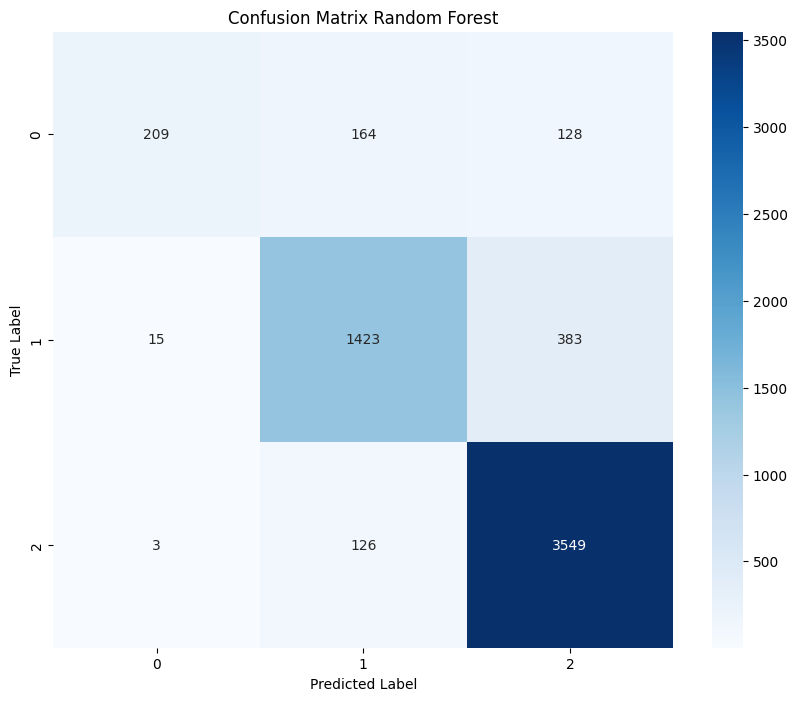

In [67]:
label_pred_rf = rf_model.predict(fitur_test_rf)
label_pred_train_rf = rf_model.predict(fitur_train_rf)

# Evaluasi pada data training
accuracy_train_rf = accuracy_score(label_train_rf, label_pred_train_rf)
print(f"Akurasi Training Random Forest: {accuracy_train_rf}")
print("Classification Report Training Random Forest:")
print(classification_report(label_train_rf, label_pred_train_rf))

# Evaluasi pada data testing
accuracy_rf = accuracy_score(label_test_rf, label_pred_rf)
print(f"Akurasi Testing Random Forest: {accuracy_rf}")
print("Classification Report Testing Random Forest:")
print(classification_report(label_test_rf, label_pred_rf))

# Membuat Confusion Matrix
cm_rf = confusion_matrix(label_test_rf, label_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **RF x TF-IDF (80/20)**

Praprocessing Teks untuk Model RF Menggunakan TF-IDF (80/20)

In [68]:
# Membagi Data menjadi Set Pelatihan dan Pengujian
fitur_train_rf2, fitur_test_rf2, label_train_rf2, label_test_rf2 = train_test_split(fitur_tfidf, label, test_size=0.2, random_state=42)

print("Total Sampel:")
print(f"Set pelatihan: {fitur_train_rf2.shape[0]} sampel")
print(f"Set pengujian: {fitur_test_rf2.shape[0]} sampel")

Total Sampel:
Set pelatihan: 15997 sampel
Set pengujian: 4000 sampel


Pelatihan dan Prediksi Model RF

In [69]:
#Inisialisasi dan latih model Random Forest
rf_model2 = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model2.fit(fitur_train_rf2, label_train_rf2)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

Evaluasi Model Random Forest dengan TF-IDF

Akurasi Training Random Forest: 0.8881040195036569
Classification Report Training Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.51      0.66      1352
           1       0.88      0.81      0.84      4849
           2       0.89      0.98      0.93      9796

    accuracy                           0.89     15997
   macro avg       0.90      0.77      0.81     15997
weighted avg       0.89      0.89      0.88     15997

Akurasi Testing Random Forest: 0.8695
Classification Report Testing Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       335
           1       0.85      0.79      0.82      1232
           2       0.87      0.97      0.92      2433

    accuracy                           0.87      4000
   macro avg       0.89      0.73      0.78      4000
weighted avg       0.87      0.87      0.86      4000



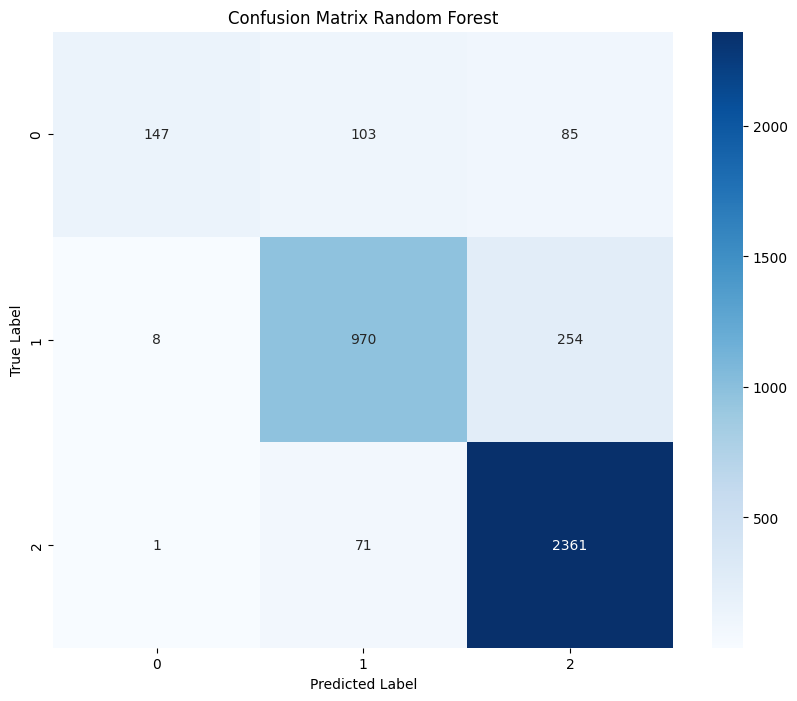

In [70]:
label_pred_rf2 = rf_model2.predict(fitur_test_rf2)
label_pred_train_rf2 = rf_model2.predict(fitur_train_rf2)

# Evaluasi pada data training
accuracy_train_rf2 = accuracy_score(label_train_rf2, label_pred_train_rf2)
print(f"Akurasi Training Random Forest: {accuracy_train_rf2}")
print("Classification Report Training Random Forest:")
print(classification_report(label_train_rf2, label_pred_train_rf2))

# Evaluasi pada data testing
accuracy_rf2 = accuracy_score(label_test_rf2, label_pred_rf2)
print(f"Akurasi Testing Random Forest: {accuracy_rf2}")
print("Classification Report Testing Random Forest:")
print(classification_report(label_test_rf2, label_pred_rf2))

# Membuat Confusion Matrix
cm_rf2 = confusion_matrix(label_test_rf2, label_pred_rf2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **LSTM x TF-IDF (70/20/10)**

Praprocessing Teks untuk Model LSTM Menggunakan TF-IDF (70/20/10)

In [71]:
# Menginisialisasi tokenizer dan membatasi jumlah kata unik sebanyak 10.000
tokenizer = Tokenizer(num_words=10000)

# Menyesuaikan tokenizer dengan teks yang telah dibersihkan
tokenizer.fit_on_texts(fitur)

# Mengubah teks menjadi urutan angka berdasarkan kamus tokenizer
fitur_sekuensial = tokenizer.texts_to_sequences(fitur)

# Menyamakan panjang urutan dengan padding (maksimal 100 kata)
fitur_padat = pad_sequences(fitur_sekuensial, maxlen=100)

In [72]:
jumlah_kelas = len(np.unique(label))
print(f"Jumlah kelas: {jumlah_kelas}")

# Menampilkan dimensi dari fitur hasil padding
print(f"Dimensi urutan fitur: {fitur_padat.shape}")

# Menampilkan ukuran kosa kata dari tokenizer
kosa_kata_index = tokenizer.word_index
print(f"\nUkuran kosa kata: {len(kosa_kata_index)} kata")

Jumlah kelas: 3
Dimensi urutan fitur: (19997, 100)

Ukuran kosa kata: 9937 kata


Pelatihan dan Prediksi Model LSTM

In [73]:
fitur_latih_lstm, fitur_uji_lstm, label_latih_lstm, label_uji_lstm = train_test_split(
    fitur_padat, label, test_size=0.2, random_state=42
)

# Mengambil 10% dari 80% data latih sebagai data validasi (0.1 / 0.8 = 0.125)
fitur_latih_lstm, fitur_validasi_lstm, label_latih_lstm, label_validasi_lstm = train_test_split(
    fitur_latih_lstm, label_latih_lstm, test_size=0.125, random_state=42
)

# Menampilkan jumlah sampel di setiap subset
print("Total Sampel:")
print(f"Set pelatihan: {fitur_latih_lstm.shape[0]} sampel")
print(f"Set validasi : {fitur_validasi_lstm.shape[0]} sampel")
print(f"Set pengujian: {fitur_uji_lstm.shape[0]} sampel")

Total Sampel:
Set pelatihan: 13997 sampel
Set validasi : 2000 sampel
Set pengujian: 4000 sampel


In [74]:
# Membuat model LSTM untuk klasifikasi sentimen
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),       # Representasi kata dalam vektor
    SpatialDropout1D(0.4),                                               # Dropout untuk regularisasi
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),                       # LSTM untuk memahami urutan kata
    Dense(3, activation='softmax')                                       # Output 3 kelas sentimen
])

# Menyusun model dengan loss dan optimizer
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Callback untuk kontrol pelatihan
callback_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
callback_lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2
)

# Daftar callback
callbacks = [callback_early_stopping, callback_lr_reduction]

# Menjalankan pelatihan model
riwayat_latihan = model_lstm.fit(
    fitur_latih_lstm, label_latih_lstm,
    validation_data=(fitur_validasi_lstm, label_validasi_lstm),
    epochs=10,
    batch_size=64,
    verbose=1,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 76s 311ms/step - accuracy: 0.6778 - loss: 0.7457 - val_accuracy: 0.8980 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 78s 309ms/step - accuracy: 0.9196 - loss: 0.2181 - val_accuracy: 0.9450 - val_loss: 0.1683 - learning_rate: 0.0010
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 83s 313ms/step - accuracy: 0.9683 - loss: 0.0987 - val_accuracy: 0.9525 - val_loss: 0.1532 - learning_rate: 0.0010
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 308ms/step - accuracy: 0.9808 - loss: 0.0556 - val_accuracy: 0.9550 - val_loss: 0.1623 - learning_rate: 0.0010
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 83s 312ms/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.9550 - val_loss: 0.1744 - learning_rate: 0.0010


Evaluasi Model LSTM dengan TF-IDF


438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
Laporan Klasifikasi (Data Latih):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1186
           1       0.98      0.98      0.98      4220
           2       1.00      1.00      1.00      8591

    accuracy                           0.99     13997
   macro avg       0.98      0.98      0.98     13997
weighted avg       0.99      0.99      0.99     13997

Laporan Klasifikasi (Data Validasi):
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       166
           1       0.92      0.94      0.93       629
           2       0.97      0.97      0.97      1205

    accuracy                           0.95      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.95      0.95      0.95      2000



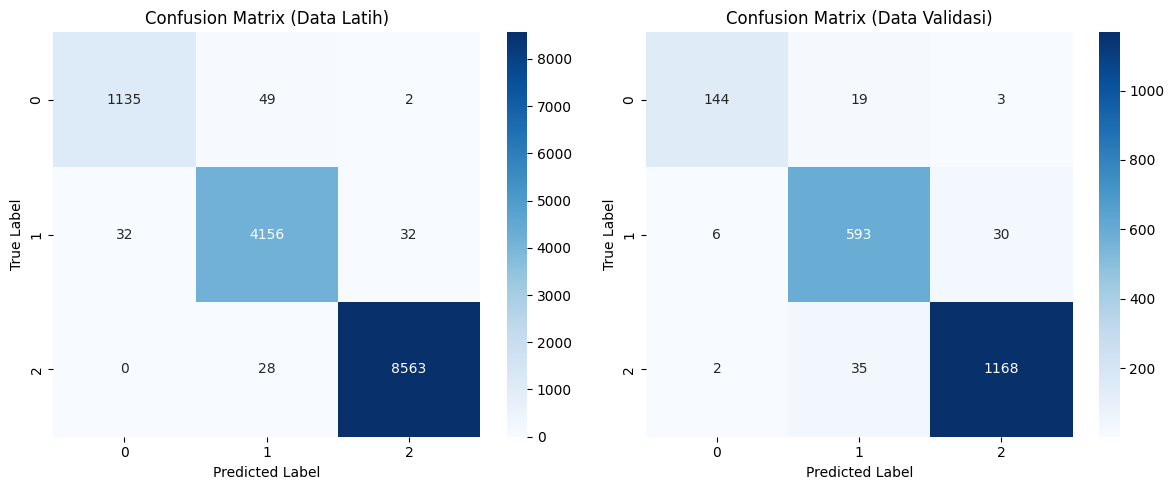

In [75]:
# Prediksi Label untuk Data Uji
prediksi_latih_lstm = model_lstm.predict(fitur_latih_lstm)
prediksi_latih_lstm = np.argmax(prediksi_latih_lstm, axis=1) # Mengambil indeks kelas dengan probabilitas tertinggi

prediksi_validasi_lstm = model_lstm.predict(fitur_validasi_lstm)
prediksi_validasi_lstm = np.argmax(prediksi_validasi_lstm, axis=1) # Mengambil indeks kelas dengan probabilitas tertinggi

# Laporan Klasifikasi
print("Laporan Klasifikasi (Data Latih):")
print(classification_report(label_latih_lstm, prediksi_latih_lstm))

print("Laporan Klasifikasi (Data Validasi):")
print(classification_report(label_validasi_lstm, prediksi_validasi_lstm))

# Confusion Matrix
cm_latih_lstm = confusion_matrix(label_latih_lstm, prediksi_latih_lstm)
cm_validasi_lstm = confusion_matrix(label_validasi_lstm, prediksi_validasi_lstm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_latih_lstm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Latih)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(cm_validasi_lstm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Data Validasi)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

## **Bag of Words Module**

In [76]:
# Load Data
ulasan_bow = pd.read_csv('data_bersih_berlabel.csv')

In [77]:
ulasan_bow.head()

,content,score,word_count,clean_content,casefold_content,tokens,stemmed_tokens,tokens_negation,tokens_slang,stopword_removal,sentiment_label,sentiment_score
0,Mantap 🔥,5,2,Mantap 🔥,mantap 🔥,"['mantap', '🔥']","['mantap', '']","['mantap', '']","['mantap', '']","['mantap', '']",positif,1
1,"Gatau kenapa, dari kemarin tuh aku gabisa buat...",1,30,Gatau kenapa dari kemarin tuh aku gabisa buat ...,gatau kenapa dari kemarin tuh aku gabisa buat ...,"['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kenapa', 'dari', 'kemarin', 'tuh', ...","['gatau', 'kemarin', 'tuh', 'tidak bisa', 'pos...",positif,1
2,Dukun aku buat menjangkau bintang direels,5,6,Dukun aku buat menjangkau bintang direels,dukun aku buat menjangkau bintang direels,"['dukun', 'aku', 'buat', 'menjangkau', 'bintan...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'aku', 'buat', 'jangkau', 'bintang',...","['dukun', 'jangkau', 'bintang', 'direels']",negatif,-1
3,ada apakah selalu for close pas mau membuka ap...,1,11,ada apakah selalu for close pas mau membuka ap...,ada apakah selalu for close pas mau membuka ap...,"['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'close', 'p...","['ada', 'apakah', 'selalu', 'for', 'tutup', 'p...","['tutup', 'pas', 'buka', 'aplikasi', 'instagram']",netral,0
4,Good,5,1,Good,good,['good'],['good'],['good'],['bagus'],['bagus'],positif,1


In [78]:
# Ekstrak Data untuk Klasifikasi
texts = ulasan_bow['stopword_removal'].tolist()
labels = ulasan_bow['sentiment_label'].tolist()

In [79]:
class BOWVectorizer:
    def __init__(self, max_features=5000):
        self.vectorizer = CountVectorizer(
            max_features=max_features
        )

    def fit_transform(self, texts):
        # Transformasi BoW
        bow_matrix = self.vectorizer.fit_transform(texts)

        return bow_matrix.toarray(), self.vectorizer.get_feature_names_out()

    def transform(self, texts):
        # Transformasi BoW
        bow_matrix = self.vectorizer.transform(texts)

        return bow_matrix.toarray()


## **N-Gram Module**

In [80]:
class NGramVectorizer:
    def __init__(self, ngram_range=(1,2), max_features=5000):
        self.vectorizer = TfidfVectorizer(
            ngram_range=ngram_range,
            max_features=max_features
        )

    def fit_transform(self, texts):
        # Transformasi N-Gram
        ngram_matrix = self.vectorizer.fit_transform(texts)

        return ngram_matrix.toarray(), self.vectorizer.get_feature_names_out()

    def transform(self, texts):
        # Transformasi N-Gram
        ngram_matrix = self.vectorizer.transform(texts)

        return ngram_matrix.toarray()

## **SVM x BoW (80/20)**

Praprocessing Teks untuk Model SVM Menggunakan BoW (80/20)

In [81]:
texts_train_bow, texts_test_bow, label_train_bow, label_test_bow = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [82]:
# Inisialisasi BoW Vectorizer
bow_vectorizer = BOWVectorizer(max_features=10000)

In [83]:
# Transformasi data training menggunakan BoW
texts_bow_train, bow_features = bow_vectorizer.fit_transform(texts_train_bow)

# Transformasi data testing menggunakan BoW
texts_bow_test = bow_vectorizer.transform(texts_test_bow)

Pelatihan dan Prediksi Model SVM

In [84]:
# Inisialisasi Linear SVM
linear_svm_bow = SVC(kernel='linear', class_weight='balanced')

In [85]:
# Latih model
linear_svm_bow.fit(texts_bow_train, label_train_bow)

SVC(class_weight='balanced', kernel='linear')

Evaluasi Model SVM dengan BoW

In [86]:
# Prediksi
prediksi_latih_bow = linear_svm_bow.predict(texts_bow_train)
prediksi_uji_bow = linear_svm_bow.predict(texts_bow_test)

# Confusion Matrix
cm_latih_bow = confusion_matrix(label_train_bow, prediksi_latih_bow)
cm_uji_bow = confusion_matrix(label_test_bow, prediksi_uji_bow)

=== Evaluasi Model SVM Linear dengan BoW ===

Classification Report (Data Latih):
              precision    recall  f1-score   support

     negatif       0.99      1.00      0.99      1349
      netral       0.98      1.00      0.99      4865
     positif       1.00      0.99      1.00      9783

    accuracy                           0.99     15997
   macro avg       0.99      1.00      0.99     15997
weighted avg       0.99      0.99      0.99     15997


Classification Report (Data Uji):
              precision    recall  f1-score   support

     negatif       0.87      0.88      0.87       338
      netral       0.92      0.95      0.93      1216
     positif       0.99      0.97      0.98      2446

    accuracy                           0.95      4000
   macro avg       0.92      0.93      0.93      4000
weighted avg       0.96      0.95      0.96      4000



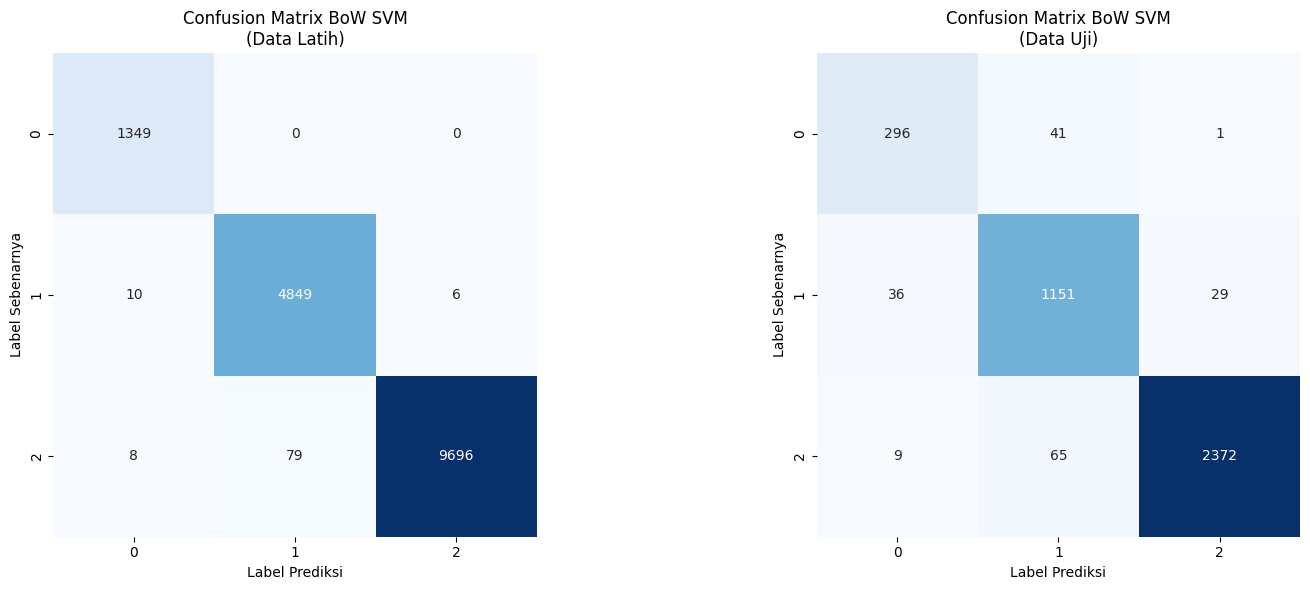

In [87]:
# Cetak Laporan Klasifikasi
print("=== Evaluasi Model SVM Linear dengan BoW ===")

print("\nClassification Report (Data Latih):")
print(classification_report(label_train_bow, prediksi_latih_bow))

print("\nClassification Report (Data Uji):")
print(classification_report(label_test_bow, prediksi_uji_bow))

# Confusion Matrix Data Latih
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_latih_bow, annot=True, fmt="d", cmap="Blues",
            square=True, cbar=False)
plt.title("Confusion Matrix BoW SVM\n(Data Latih)")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")

# Confusion Matrix Data Uji
plt.subplot(1, 2, 2)
sns.heatmap(cm_uji_bow, annot=True, fmt="d", cmap="Blues",
            square=True, cbar=False)
plt.title("Confusion Matrix BoW SVM\n(Data Uji)")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")

plt.tight_layout()
plt.show()

## **SVM x N-Gram (80/20)**

Praprocessing Teks untuk Model SVM Menggunakan N-Gram (80/20)

In [88]:
# Split data training dan testing (80/20)
texts_train_ngram, texts_test_ngram, label_train_ngram, label_test_ngram = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [89]:
# Inisialisasi N-Gram Vectorizer (Unigram + Bigram)
ngram_vectorizer = NGramVectorizer(
    ngram_range=(1,2),
    max_features=2000
)

In [90]:
# Transformasi data training menggunakan N-Gram
texts_ngram_train, ngram_features = ngram_vectorizer.fit_transform(texts_train_ngram)

# Transformasi data testing menggunakan N-Gram
texts_ngram_test = ngram_vectorizer.transform(texts_test_ngram)

Pelatihan dan Prediksi Model SVM

In [91]:
# Pelatihan Model SVM Linear untuk N-Gram
linear_svm_ngram = SVC(kernel='linear', class_weight='balanced')
linear_svm_ngram.fit(texts_ngram_train, label_train_ngram)

SVC(class_weight='balanced', kernel='linear')

In [92]:
# Prediksi
prediksi_latih_ngram = linear_svm_ngram.predict(texts_ngram_train)
prediksi_uji_ngram = linear_svm_ngram.predict(texts_ngram_test)

Evaluasi Model SVM dengan N-Gram

=== Evaluasi Model SVM Linear dengan N-Gram ===

Classification Report (Data Latih):
              precision    recall  f1-score   support

     negatif       0.82      0.96      0.88      1349
      netral       0.93      0.94      0.94      4865
     positif       0.99      0.96      0.98      9783

    accuracy                           0.96     15997
   macro avg       0.91      0.95      0.93     15997
weighted avg       0.96      0.96      0.96     15997


Classification Report (Data Uji):
              precision    recall  f1-score   support

     negatif       0.70      0.83      0.76       338
      netral       0.86      0.90      0.88      1216
     positif       0.98      0.94      0.96      2446

    accuracy                           0.92      4000
   macro avg       0.85      0.89      0.86      4000
weighted avg       0.92      0.92      0.92      4000



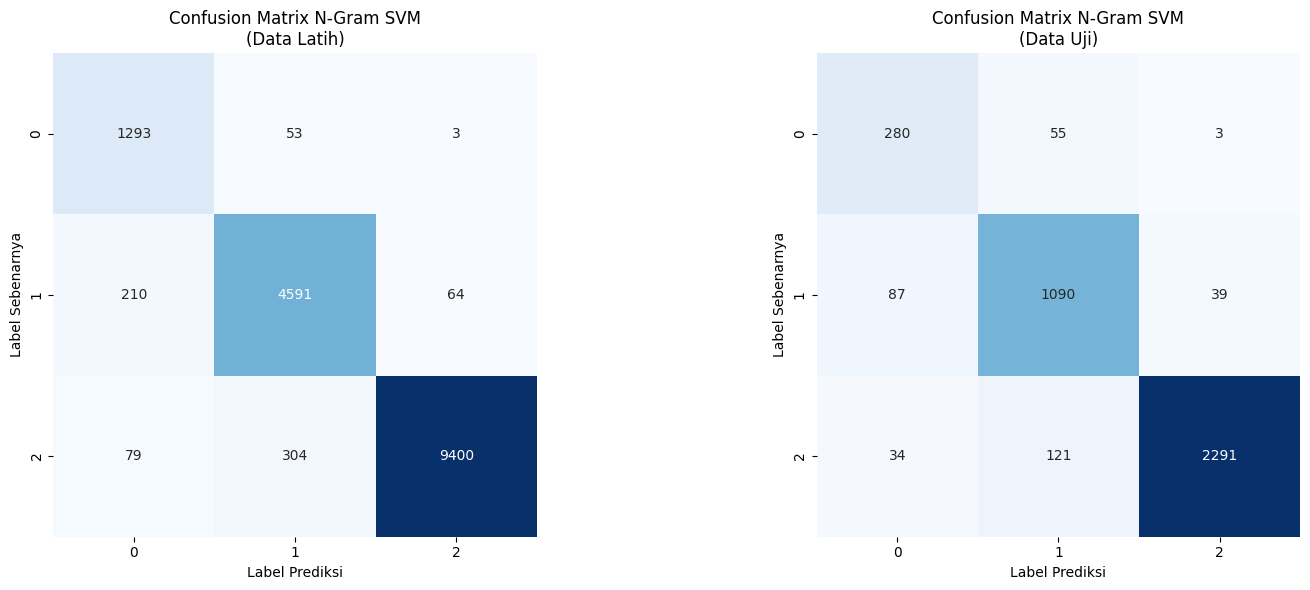

In [93]:
# Confusion Matrix
cm_latih_ngram = confusion_matrix(label_train_ngram, prediksi_latih_ngram)
cm_uji_ngram = confusion_matrix(label_test_ngram, prediksi_uji_ngram)

# Cetak Laporan Klasifikasi
print("=== Evaluasi Model SVM Linear dengan N-Gram ===")

print("\nClassification Report (Data Latih):")
print(classification_report(label_train_ngram, prediksi_latih_ngram))

print("\nClassification Report (Data Uji):")
print(classification_report(label_test_ngram, prediksi_uji_ngram))

# Visualisasi Confusion Matrix
plt.figure(figsize=(16, 6))

# Confusion Matrix Data Latih
plt.subplot(1, 2, 1)
sns.heatmap(cm_latih_ngram, annot=True, fmt="d", cmap="Blues",
            square=True, cbar=False)
plt.title("Confusion Matrix N-Gram SVM\n(Data Latih)")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")

# Confusion Matrix Data Uji
plt.subplot(1, 2, 2)
sns.heatmap(cm_uji_ngram, annot=True, fmt="d", cmap="Blues",
            square=True, cbar=False)
plt.title("Confusion Matrix N-Gram SVM\n(Data Uji)")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")

plt.tight_layout()
plt.show()

Menyimpan Model

In [94]:
# Simpan Model TF-IDF
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Simpan Model SVM x TF-IDF (80/20)
with open('svm_tfidf_8020_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Simpan Model SVM x TF-IDF (60/40)
with open("svm_tfidf_6040_model.pkl", "wb") as f:
    pickle.dump(svm_model2, f)

# Simpan Model RF x TF-IDF (70/30)
with open("rf_tfidf_7030_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Simpan Model RF x TF-IDF (80/20)
with open("rf_tfidf_8020_model.pkl", "wb") as f:
    pickle.dump(rf_model2, f)

# Simpan Model LSTM x TF-IDF (80/20)
model_lstm.save("lstm_tfidf_702010_model.h5")

# Simpan Model Bag of Words
with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(BOWVectorizer, f)

# Simpan Model N-Gram
with open("ngram_model.pkl", "wb") as f:
    pickle.dump(NGramVectorizer, f)

# Simpan Model SVM x BoW (80/20)
with open("svm_bow_8020_model.pkl", "wb") as f:
    pickle.dump(linear_svm_bow, f)

# Simpan Model SVM x N-Gram (80/20)
with open("svm_ngram_8020_model.pkl", "wb") as f:
    pickle.dump(linear_svm_ngram, f)

In [95]:
pip freeze > requirements.txt


Notebook ini melakukan analisis sentimen pada dataset ulasan aplikasi Instagram. Proses dimulai dari:

1.  **Pengumpulan Data**: Mengunduh data ulasan dan kamus kata dari Google Drive.
2.  **Data Wrangling & Cleaning**: Membersihkan data dari missing value dan melakukan berbagai tahapan text preprocessing (pembersihan karakter, case folding, tokenisasi, stemming, negation handling, normalisasi kata, dan penghapusan stopwords) untuk menyiapkan teks ulasan.
3.  **Eksplorasi Data (EDA)**: Menganalisis distribusi rating dan panjang ulasan untuk memahami karakteristik dataset.
4.  **Pelabelan Sentimen**: Menggunakan pendekatan berbasis lexikon (kamus kata positif dan negatif) untuk memberikan label sentimen (positif, netral, negatif) dan skor pada setiap ulasan.
5.  **Persiapan Data & Rekayasa Fitur**: Menyiapkan data tekstual untuk model machine learning dengan mengubahnya menjadi representasi numerik menggunakan TF-IDF, Bag of Words (BoW), dan N-Gram.
6.  **Pemodelan & Evaluasi**: Melatih dan mengevaluasi beberapa model klasifikasi sentimen, termasuk SVM dan Random Forest dengan fitur TF-IDF (dengan berbagai pembagian data seperti 80/20, 60/40, 70/30) serta model LSTM dengan fitur TF-IDF. Performa model dievaluasi menggunakan metrik seperti akurasi, precision, recall, f1-score, dan divisualisasikan melalui confusion matrix.
7.  **Penyimpanan Model**: Menyimpan model-model yang telah dilatih dan vectorizer yang digunakan untuk penggunaan di masa mendatang.
